# Probabilidade de erro de bit para diferentes codificações

$$ P_{B_{unipolar}} = Q\left(\sqrt[2]{\frac{E_b}{N_0}}\right) $$
$$ P_{B_{bipolar}} = Q\left(\sqrt[2]{2\,\frac{E_b}{N_0}}\right) $$
$$ P_{B_{multi nivel}} = \frac{M-1}/{M}\,Q\left(\sqrt[2]{\frac{6}{M-1}\,\frac{E_b}{N_0}}\right) $$

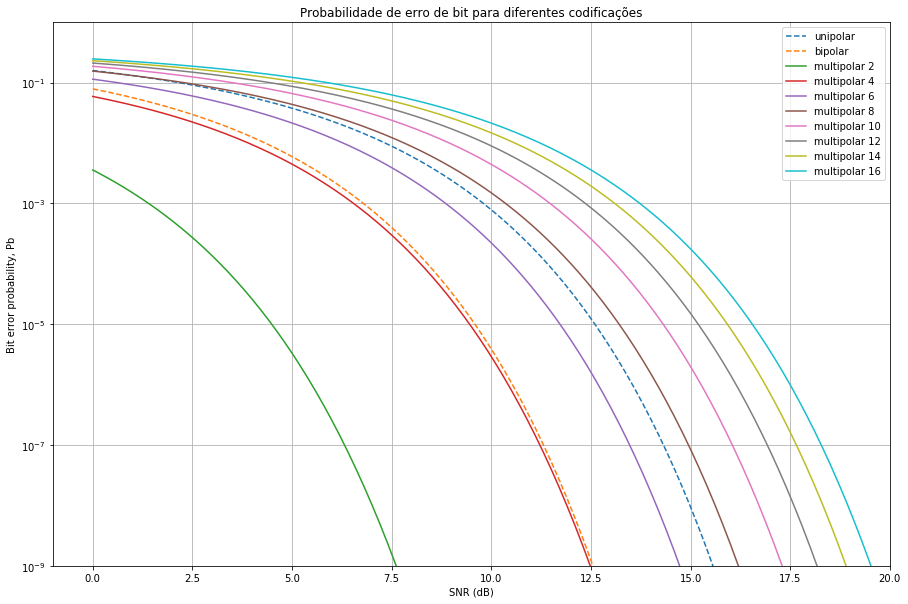

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def qfunc(t: np.array) -> np.array:
    return 0.5 - 0.5 * np.array([math.erf(x / math.sqrt(2.)) for x in t])

plt.figure(figsize=(15, 10))
plt.title("Probabilidade de erro de bit para diferentes codificações")

snr_db = np.linspace(0, 1000, 10000)
snr_lin = 10**(snr_db/10)
Pb_unipolar = qfunc(np.sqrt(snr_lin))
Pb_bipolar = qfunc(np.sqrt(2 * snr_lin))

plt.semilogy(snr_db, Pb_unipolar, '--', label='unipolar')
plt.semilogy(snr_db, Pb_bipolar, '--', label='bipolar')

for M in range(2, 16+2, 2):
    Pb_multi = ((M - 1) / M) * qfunc(np.sqrt((6 / (M - 1)) * snr_lin))
    plt.semilogy(snr_db, Pb_multi, label=f'multipolar {M}')

plt.legend()
plt.grid()
plt.xlim([-1, 20])
plt.ylim([10**-9, 1])
plt.ylabel("Bit error probability, Pb")
plt.xlabel("SNR (dB)")
plt.show()
    